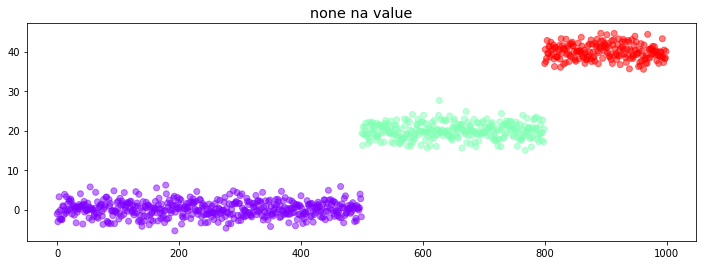

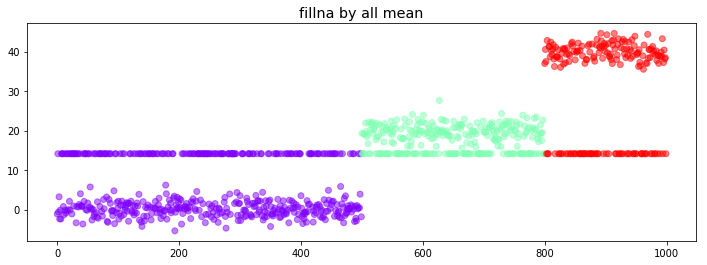

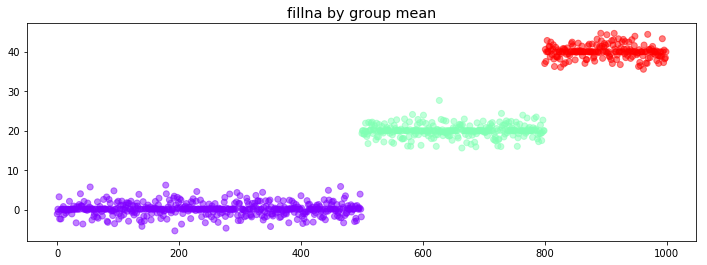

In [204]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df = pd.concat([
    pd.DataFrame({'v':np.random.normal(i*20, 2, num),'c':[chr(ord('A')+i) for j in range(0, num)]}) 
    for i, num in enumerate([500, 300, 200])]).reset_index(drop=True)

plt.figure(figsize=(12, 4))
plt.scatter(range(0, len(df)), df['v'], 
            c= df['c'].apply(lambda x: ord(x)), 
            cmap=plt.cm.rainbow, 
            alpha=0.5)
plt.title("none na value", fontsize='x-large')
plt.savefig('../../assets/images/markdown_img/180605_1731_missing_numeric_v_non_na_value.svg')
plt.show()

## drop somethings 
df_nan = df.copy()
df_nan['v'] =[ np.nan if abs(np.random.normal(0, 1)) > 1.0 else x for x in df['v']]

## 그냥 평균으로 일괄적으로 fillna를 해주면 아래 그림처럼 문제가 발생할 수 있음. 
df_nan_fillna_mean = df_nan.fillna(df_nan.mean())
plt.figure(figsize=(12, 4))
plt.scatter(range(0, len(df_nan)), df_nan_fillna_mean['v'], 
            c= df_nan_fillna_mean['c'].apply(lambda x: ord(x)), 
            cmap=plt.cm.rainbow, 
            alpha=0.5)
plt.title("fillna by all mean", fontsize='x-large')
plt.savefig('../../assets/images/markdown_img/180605_1731_missing_numeric_v_fillna_all_mean.svg')
plt.show()

"""
- 그래서 class를 고려해서 평균을 따로 내서 넣어주는 것이 좋다. 
- 아래처럼 그룹별로 평균을 낸 값으로 따로따로 그룹별로 dataframe을 계산 한 다음, 값을 넣어준다. 
- 

"""

df_nan_with_group_mean = pd.concat(
    [g[1].fillna(g[1].mean()) for g in df_nan.groupby('c')]
)

plt.figure(figsize=(12, 4))
plt.scatter(range(0, len(df_nan_with_group_mean)), df_nan_with_group_mean['v'], 
            c=df_nan_with_group_mean['c'].apply(lambda x: ord(x)), 
            cmap=plt.cm.rainbow, 
            alpha=0.5)
plt.title("fillna by group mean", fontsize='x-large')
plt.savefig('../../assets/images/markdown_img/180605_1731_missing_numeric_v_fillna_group_mean.svg')
plt.show()

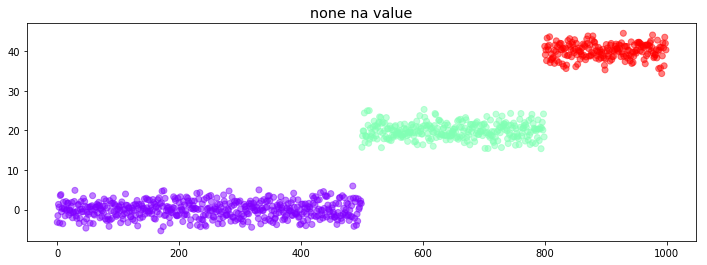

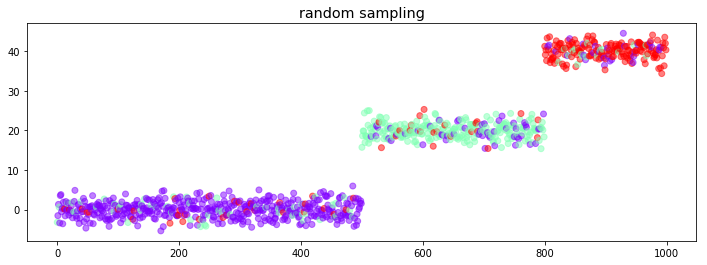

'\n- cluster 별로 평균을 내고, 그 중에서 가장 가까운 class를 이용해서 missing value를 채움\n'

In [197]:
"""
- 그럼 반대로, categorical value가 na일 경우 
"""

df = pd.concat([
    pd.DataFrame({'v':np.random.normal(i*20, 2, num),'c':[chr(ord('A')+i) for j in range(0, num)]}) 
    for i, num in enumerate([500, 300, 200])]).reset_index(drop=True)

plt.figure(figsize=(12, 4))
plt.scatter(range(0, len(df)), df['v'], 
            c= df['c'].apply(lambda x: ord(x)), 
            cmap=plt.cm.rainbow, 
            alpha=0.5)
plt.title("none na value", fontsize='x-large')
plt.savefig('../../assets/images/markdown_img/180605_1734_fill_categorical_v.svg')
plt.show()
## drop somethings 
df_nan = df.copy()
df_nan['c'] =[ np.nan if abs(np.random.normal(0, 1)) > 1.0 else x for x in df['c']]

"""
그냥 빈번한 것들을 random sampling해서 넣어줄경우? 
"""
df_nan_with_random = df_nan.copy()
df_nan_with_random['c'] = [ np.random.choice(df_nan['c'].dropna()) if pd.isnull(x) else x for x in df_nan['c']]
plt.figure(figsize=(12, 4))
plt.scatter(range(0, len(df)), df_nan_with_random['v'], 
            c= df_nan_with_random['c'].apply(lambda x: ord(x)), 
            cmap=plt.cm.rainbow, 
            alpha=0.5)
plt.title("random sampling", fontsize='x-large')
plt.savefig('../../assets/images/markdown_img/180605_1734_fill_categorical_v_fill_random.svg')
plt.show()
"""
- cluster 별로 평균을 내고, 그 중에서 가장 가까운 class를 이용해서 missing value를 채움
"""

In [201]:
cluster_means = {g[0]: g[1].mean() for g in df_nan.groupby('c')}
print(cluster_means)

df_nan_similar = df_nan.copy()

vs = df_nan['v'].copy()
cs = df_nan['c'].copy()
new_cs = []

for i, c in enumerate(cs): 
    if pd.isnull(c):
        min_v_ind = cluste
        for k, v in cluster_means.items():
            print(abs(vs[i] - v))
    else:
        new_cs.append(v)
for v in cluster_means.values():
    print(v)

{'A': v   -0.035151
dtype: float64, 'B': v    19.958959
dtype: float64, 'C': v    40.050138
dtype: float64}
v   -3.151481
dtype: float64
v   -23.145591
dtype: float64
v   -43.23677
dtype: float64
v    0.650622
dtype: float64
v   -19.343488
dtype: float64
v   -39.434667
dtype: float64
v    0.175711
dtype: float64
v   -19.8184
dtype: float64
v   -39.909579
dtype: float64
v    1.630894
dtype: float64
v   -18.363217
dtype: float64
v   -38.454396
dtype: float64
v    0.022499
dtype: float64
v   -19.971611
dtype: float64
v   -40.06279
dtype: float64
v    1.849512
dtype: float64
v   -18.144598
dtype: float64
v   -38.235777
dtype: float64
v   -0.724544
dtype: float64
v   -20.718654
dtype: float64
v   -40.809834
dtype: float64
v   -0.543226
dtype: float64
v   -20.537337
dtype: float64
v   -40.628516
dtype: float64
v   -0.630772
dtype: float64
v   -20.624882
dtype: float64
v   -40.716061
dtype: float64
v    2.089045
dtype: float64
v   -17.905065
dtype: float64
v   -37.996244
dtype: float64
v    0

v   -19.778981
dtype: float64
v   -39.87016
dtype: float64
v    0.756778
dtype: float64
v   -19.237333
dtype: float64
v   -39.328512
dtype: float64
v   -0.442958
dtype: float64
v   -20.437068
dtype: float64
v   -40.528247
dtype: float64
v    0.855163
dtype: float64
v   -19.138947
dtype: float64
v   -39.230126
dtype: float64
v    2.198544
dtype: float64
v   -17.795566
dtype: float64
v   -37.886745
dtype: float64
v    1.510982
dtype: float64
v   -18.483128
dtype: float64
v   -38.574308
dtype: float64
v   -0.137448
dtype: float64
v   -20.131558
dtype: float64
v   -40.222737
dtype: float64
v    0.765694
dtype: float64
v   -19.228416
dtype: float64
v   -39.319595
dtype: float64
v   -2.212214
dtype: float64
v   -22.206324
dtype: float64
v   -42.297503
dtype: float64
v   -1.963687
dtype: float64
v   -21.957798
dtype: float64
v   -42.048977
dtype: float64
v    0.592342
dtype: float64
v   -19.401768
dtype: float64
v   -39.492947
dtype: float64
v    0.881349
dtype: float64
v   -19.112761
dtype: 

dtype: float64
v    19.101535
dtype: float64
v   -0.892576
dtype: float64
v   -20.983755
dtype: float64
v    20.398634
dtype: float64
v    0.404524
dtype: float64
v   -19.686655
dtype: float64
v    22.358222
dtype: float64
v    2.364112
dtype: float64
v   -17.727067
dtype: float64
v    22.688242
dtype: float64
v    2.694132
dtype: float64
v   -17.397047
dtype: float64
v    20.605214
dtype: float64
v    0.611104
dtype: float64
v   -19.480075
dtype: float64
v    23.266443
dtype: float64
v    3.272333
dtype: float64
v   -16.818846
dtype: float64
v    21.527057
dtype: float64
v    1.532946
dtype: float64
v   -18.558233
dtype: float64
v    19.724809
dtype: float64
v   -0.269301
dtype: float64
v   -20.36048
dtype: float64
v    21.866391
dtype: float64
v    1.872281
dtype: float64
v   -18.218899
dtype: float64
v    22.233185
dtype: float64
v    2.239075
dtype: float64
v   -17.852104
dtype: float64
v    19.807305
dtype: float64
v   -0.186806
dtype: float64
v   -20.277985
dtype: float64
v    19

In [185]:
pd.isnull(df_nan['c'])
pd.isnull(df_nan['c'][5])

True

In [47]:
# make some v nan
df['col_norm'] =[ np.nan if abs(np.random.normal(0, 1)) > 2.0 else x for x in df['col_norm']]
df['col_cat'] =[ np.nan if abs(np.random.normal(0, 1)) > 2.0 else x for x in df['col_cat']]

# 어떤 column이라도 null(np.nan) 인 경우
print()

from functools import reduce 
any_nan = reduce(np.logical_or, [df['col_norm'].isnull(), df['col_cat'].isnull()])

print(df[any_nan])
"""
- 단순히 평균을 넣는 경우에, numeric column에 대해서는 처리되지만, 그렇지 않은 경우에 대해서는 처리되지 않음. 
- 
"""
df.fillna(df.mean())

for col in df.columns: 
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        print(df[col].dtype)
for col in df.columns:
    print("{}'s na #: {}".format(col, df[col].isnull().sum()))


   col_cat  col_norm
4      NaN  1.130121
40       a       NaN
45     NaN -1.077020
59       b       NaN
68     NaN  1.620053
95       c       NaN
object
col_cat's na #: 3
col_norm's na #: 0


In [53]:
df['col_cat'] = df['col_cat'].astype('category')
#df['col_cat']

TypeError: 'str' object is not callable

AttributeError: 'Series' object has no attribute 'freq'